In [47]:
import pandas as pd
import numpy as np

# ================================================================ to_numeric ===================================================================
def to_numeric(x):
    
    ''' Realiza parsing de cada elemento da serie e os converte em numerico 
    ARG:
    x(string): string que sera transformada em numerica
    
    RETURNS:
    X_num(float/int): valor convertido em numerico e ponto como casa decimal'''
    
    
    x = x.replace(',','.')
    sep = x.split('.')
    
    if len(sep) == 2:
        x = sep[0]+'.'+sep[1]
        
        
    elif len(sep) ==3 :
        x = sep[0]+sep[1]+'.'+sep[2]
    
    else:
        x = 0
    
    x_num = pd.to_numeric(x)

    return  x_num

def preprocess_df(df):
    
    '''Realiza pre-processamento dos dados de forma a gerar um dataframe no formato adequado (dateformat e numerico)
    ARG:
    df(dataframe): dataframe a ser pre-processado
    RETURNS:
    df(dataframe)': dataframe pre-processado'''
    
    # Determina novos nome de colunas
    df.columns = ["Date", "Speed(m/s)", "Direction(°)",'Energy(kWh)']
    
    df.Date = pd.to_datetime(df.Date, dayfirst= True)
    df.dtypes
    
    # Transforma colunas em numericos 
    df['Speed(m/s)'] = pd.to_numeric(df['Speed(m/s)'].apply(to_numeric))
    df['Direction(°)'] = pd.to_numeric(df['Direction(°)'].replace('-','0'))
    df['Energy(kWh)'] = df['Energy(kWh)'].apply(to_numeric)
    
    # Trransforma kWh em MWh
    df['Energy(MWh)'] = np.round(df['Energy(kWh)'] /1000 , 2)
    df.drop('Energy(kWh)', axis = 1, inplace = True)
    
    # Associa coluna Date ao index
    df.index = pd.to_datetime(df.Date, format="%m-%d-%Y")
    # dropa coluna Date extra 
    df.drop("Date", axis=1, inplace=True)
    
    return df
def fill_na_with_mean(df):
    
    '''Preenche valores nan com a media da coluna
    
    ARG: 
    df(dataframe): dataframe que sera processado
    
    RETURNS:
    df(dataframe): dataframe com nan values preenchidos com a media da coluna'''
    
    num_cols = len(list(df.columns.values))
    
    for col in range(num_cols):
        
        df.iloc[:,col] = df.iloc[:,col].fillna(df.iloc[:,col].mean())
        
    return df

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import utils 
from utils import *

In [49]:
df = pd.read_csv("/Users/ranja/Downloads/wind_Energy.csv", sep= '\t',header = None)
df.head()

,0,1,2,3
0,01/01/2018 00:00:00,"9,23",245,"346.402,69"
1,02/01/2018 00:00:00,"6,90",242,"278.506,45"
2,03/01/2018 00:00:00,"6,32",243,"262.447,43"
3,04/01/2018 00:00:00,"10,14",227,"328.729,90"
4,05/01/2018 00:00:00,"7,02",258,"140.070,53"


In [50]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       791 non-null    object
 1   1       791 non-null    object
 2   2       791 non-null    object
 3   3       791 non-null    object
dtypes: object(4)
memory usage: 24.8+ KB


In [51]:
df = preprocess_df(df)
df = fill_na_with_mean(df)
    
df.head()

,Speed(m/s),Direction(°),Energy(MWh)
Date,,,
2018-01-01,9.23,245,346.40
2018-01-02,6.90,242,278.51
2018-01-03,6.32,243,262.45
2018-01-04,10.14,227,328.73
2018-01-05,7.02,258,140.07


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 791 entries, 2018-01-01 to 2020-03-01
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Speed(m/s)    791 non-null    float64
 1   Direction(°)  791 non-null    int64  
 2   Energy(MWh)   791 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 24.7 KB


In [53]:
df.isnull().sum()

Speed(m/s)      0
Direction(°)    0
Energy(MWh)     0
dtype: int64

In [54]:
Energy = df['Energy(MWh)']

display('Energy:', type(Energy))
print()
display('Shape:',Energy.shape)
print()
Energy.head()

'Energy:'

pandas.core.series.Series

'Shape:'

(791,)

Date
2018-01-01    346.40
2018-01-02    278.51
2018-01-03    262.45
2018-01-04    328.73
2018-01-05    140.07
Name: Energy(MWh), dtype: float64

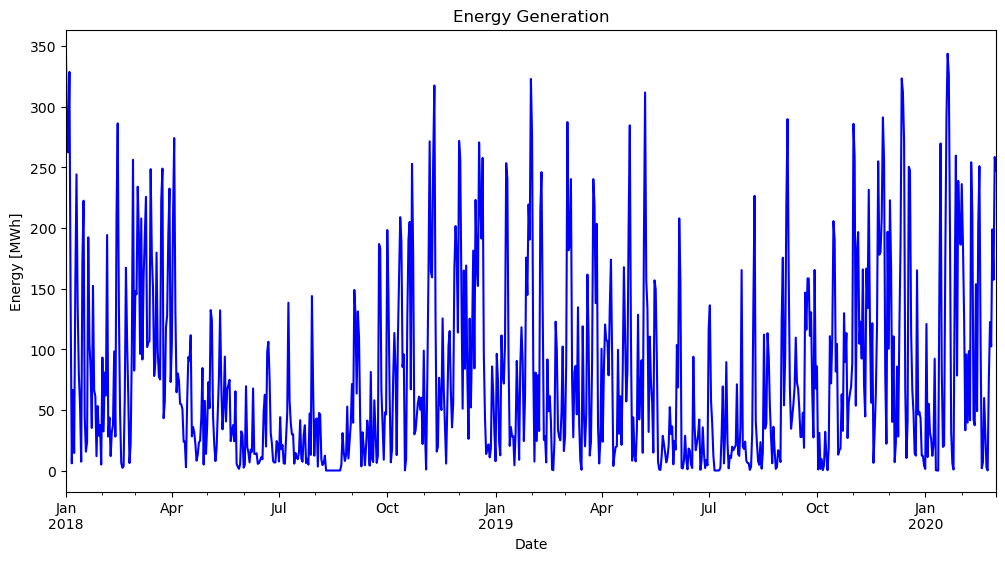

In [55]:
# display plot 
plt.figure(figsize = (12,6))
Energy.plot(title = 'Energy Generation', color = 'blue')
plt.ylabel('Energy [MWh]')
plt.show()

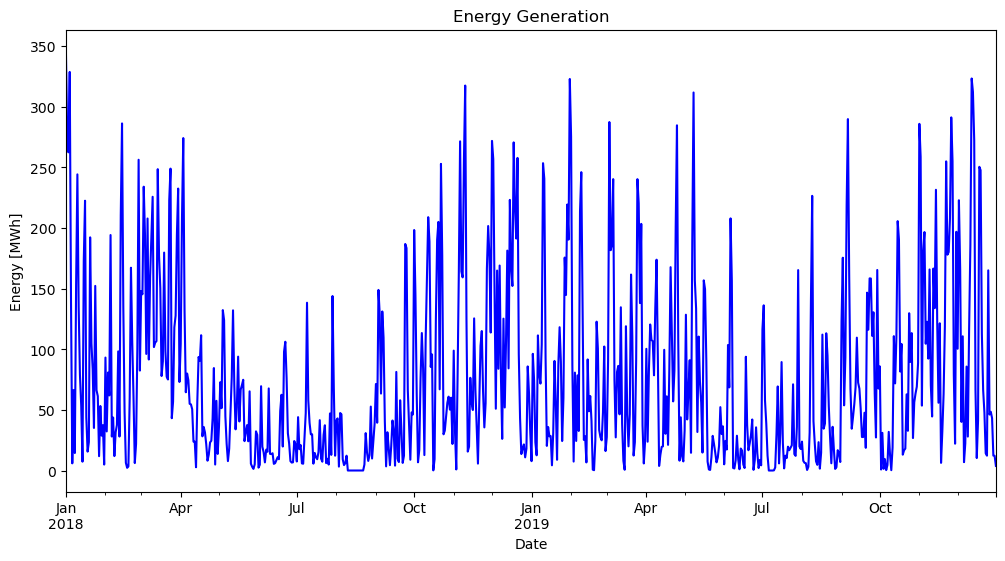

In [56]:
# Slicing up to dec-19
final_2019 = 730
plt.figure(figsize = (12,6))
Energy[0:final_2019].plot(title = 'Energy Generation', color = 'blue')
plt.ylabel('Energy [MWh]')
plt.show()

In [57]:
Energy[0:final_2019].tail()

Date
2019-12-27    48.44
2019-12-28    43.18
2019-12-29    12.30
2019-12-30    12.09
2019-12-31     3.79
Name: Energy(MWh), dtype: float64

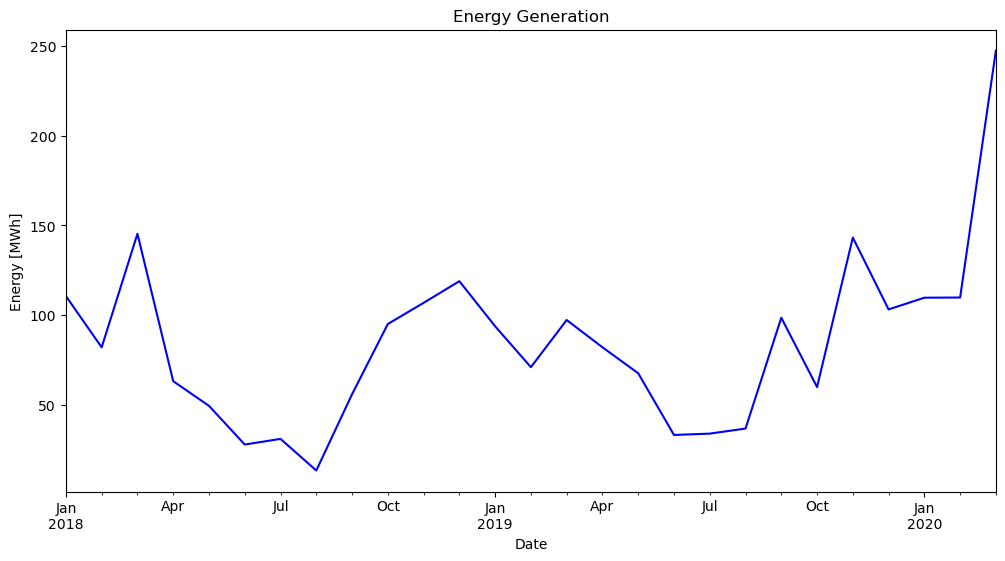

In [58]:
freq = 'M'
# Mean generation per month
media_energy_df = Energy.resample(freq).mean()

# Display plot
plt.figure(figsize = (12,6))
media_energy_df.plot(title = 'Energy Generation', color = 'blue')
plt.ylabel('Energy [MWh]')
plt.show()

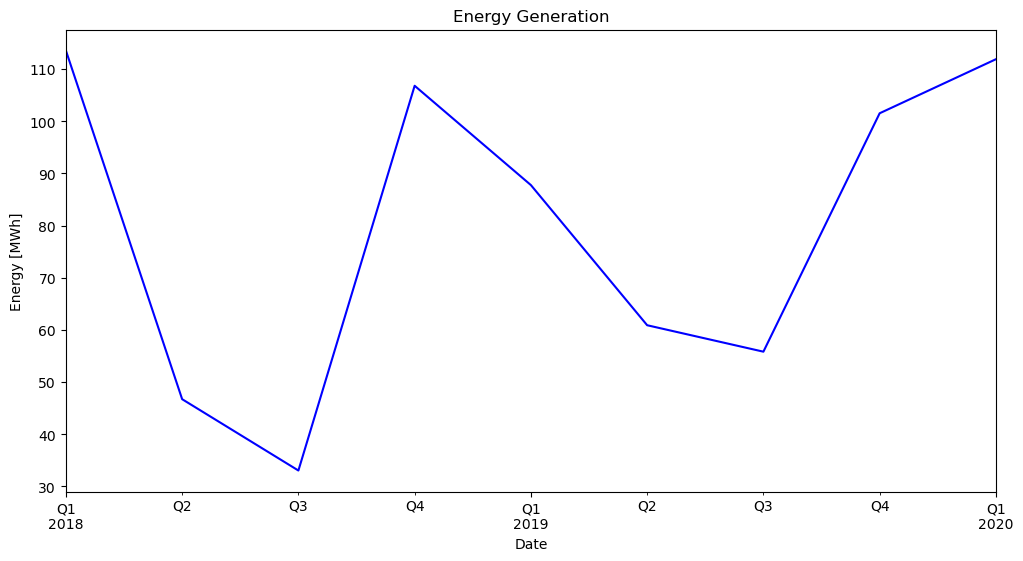

In [59]:
freq = 'Q'
# Calculate energy generation per quarter 
mean_energy_df = Energy.resample(freq).mean()

# Display 
plt.figure(figsize = (12,6))
mean_energy_df.plot(title = 'Energy Generation', color = 'blue')
plt.ylabel('Energy [MWh]')
plt.show()

In [60]:
def make_time_series(energy_df, years, freq='D', start_idx=0, has_leap_year = None, leap_year = None):
    
    '''
    Creates as many time series as therea are complete years. Accounts for leap year when required.
    

    ARG:
    energy_df(dataframe): Dataframe of energy generated by the Sotavendo wind farm
    years(list): list of years to make time series out of. ex. ['2018', '2019']
    freq(string): The frequency of the data recording (D= daily, M = monthly...)
    start_indx(int): The starting index of the first point in the first series - default = 0 
    has_leap_year(binario):Binary that informs whether the list of years has a leap year
    leap_year(int): The Leap year
    
    RETURNS:
    time_series(list): List of series'''
    
    # grava as time series
    time_series = []
    
    if has_leap_year:
        # valor do ano bissexto
        leap = leap_year
    

    # Cria um time series para cada ano da lista years
    for i in range(len(years)):

        year = years[i]
        
        if has_leap_year:
            year == leap
            end_idx = start_idx+366
            
        else:
            end_idx = start_idx+365

        # Cria o inicio e o fim do nosso datetime
        t_start = year + '-01-01' # Primeiro de janeiro e nosso t_start (ou t0)
        t_end = year + '-12-31' # 31 de Dezembro e o t_end

        # Slicing nos dados de energia
        data = energy_df[start_idx:end_idx]

        # Cria time series para cada ano
        index = pd.date_range(start=t_start, end =t_end,  freq=freq)
        time_series.append(pd.Series(data=data, index=index))
        
        start_idx = end_idx
    
    # Retorna lista de time series
    return time_series

In [61]:
energy_df = df['Energy(MWh)']
energy_df.head()

Date
2018-01-01    346.40
2018-01-02    278.51
2018-01-03    262.45
2018-01-04    328.73
2018-01-05    140.07
Name: Energy(MWh), dtype: float64

In [62]:
# Verificando a funcao
# Time series para cada ano
years = ['2018', '2019']

freq ='D' # frequencia diaria

# Cria time series
time_series = make_time_series(energy_df, years, freq=freq)

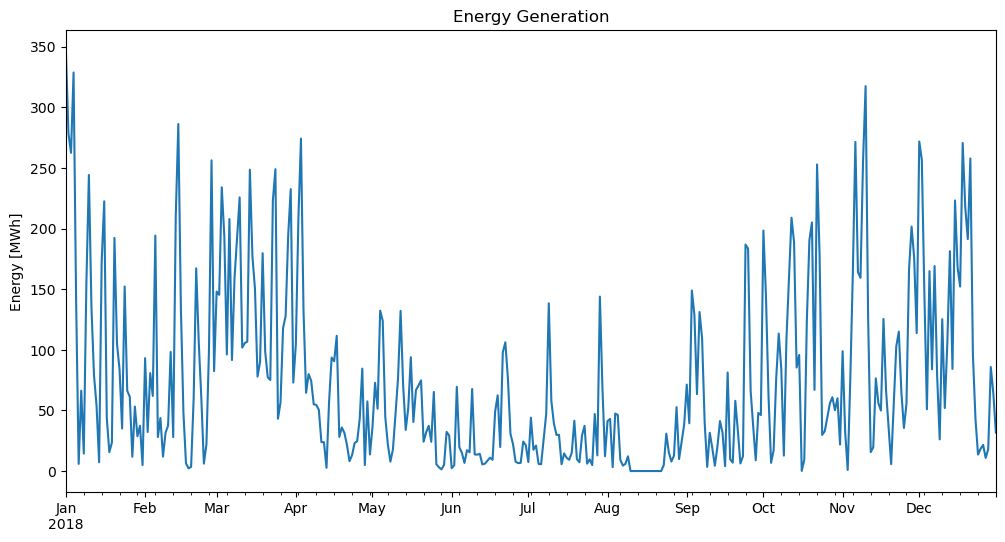

In [63]:
# Display the first time series
time_series_idx = 0

plt.figure(figsize=(12,6))
time_series[time_series_idx].plot(title = 'Energy Generation')
plt.ylabel('Energy [MWh]')
plt.show()

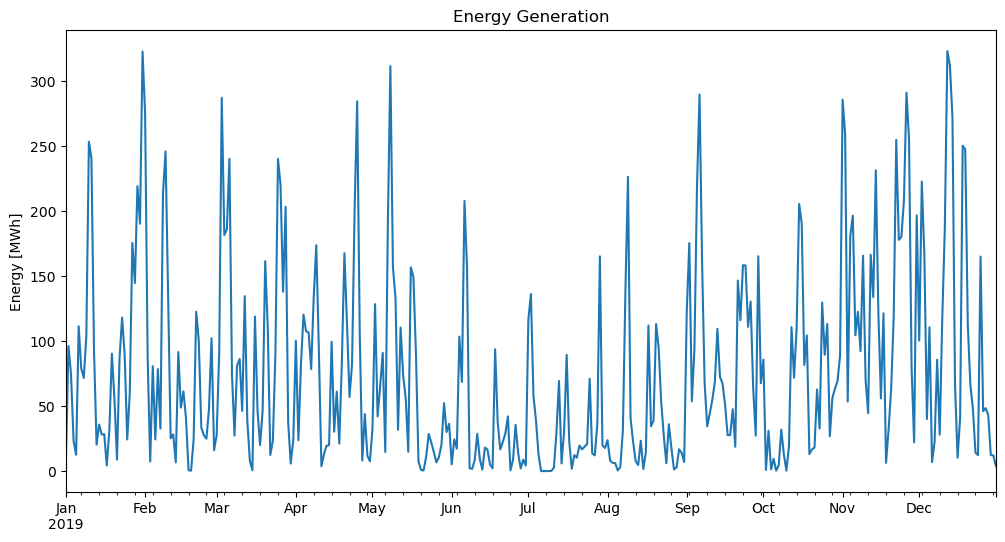

In [64]:
# Display the second time series
time_series_idx = 1

plt.figure(figsize=(12,6))
time_series[time_series_idx].plot(title = 'Energy Generation')
plt.ylabel('Energy [MWh]')
plt.show()

In [65]:
# Created truncated,training time series
def create_training_series(complete_time_series, prediction_lenght):
    '''Creates a list of time series data and training time series
    ARG: 
    complete_time_series(list): A list of all complete time series
    prediction_lenght(): The number of points that we want to predict
    
    RETURNS:
    time_series_training(list): A list of training time series'''
    
    # get training series
    time_series_training = []
    
    for ts in complete_time_series:
        time_series_training.append(ts[: -prediction_lenght])
        
    return time_series_training

In [66]:
prediction_length = 30

time_series_training = create_training_series(time_series, prediction_length)

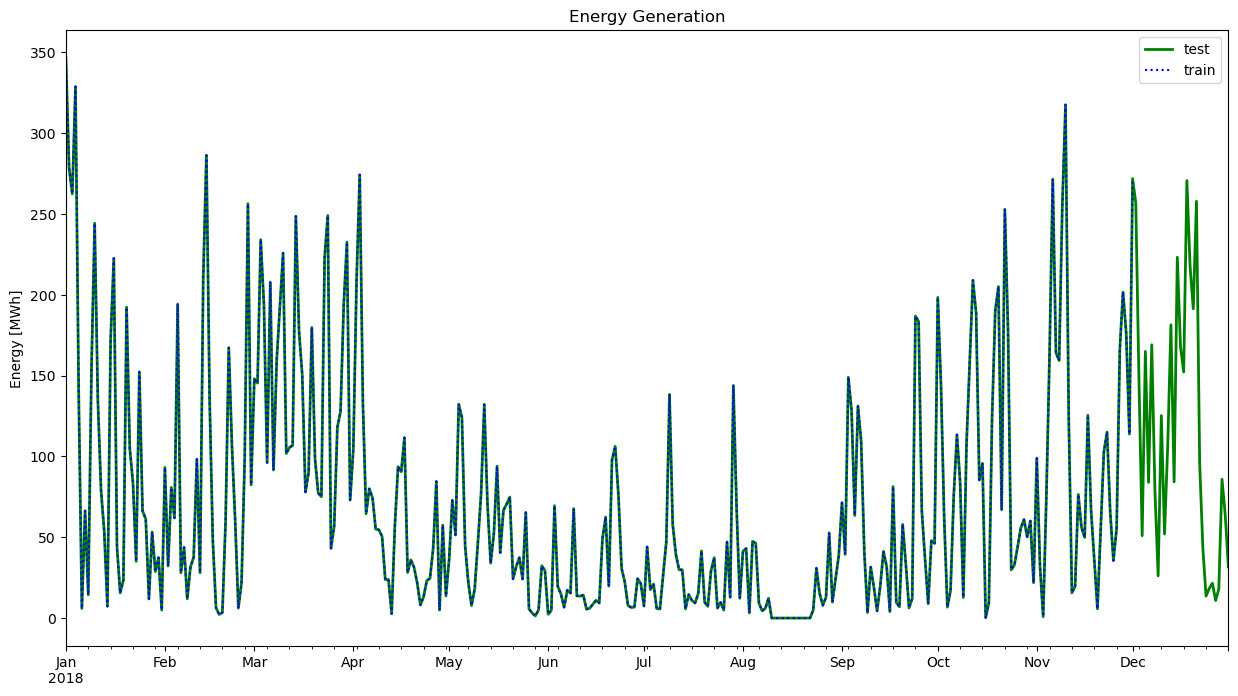

In [67]:
# Display the first time series
time_series_idx = 0

plt.figure(figsize=(15,8))

time_series[time_series_idx].plot(label= 'test',color ='g', lw = 2,title = 'Energy Generation')

time_series_training[time_series_idx].plot(label= 'train',color = 'b', ls = ':')

plt.ylabel('Energy [MWh]')
plt.legend()
plt.show()

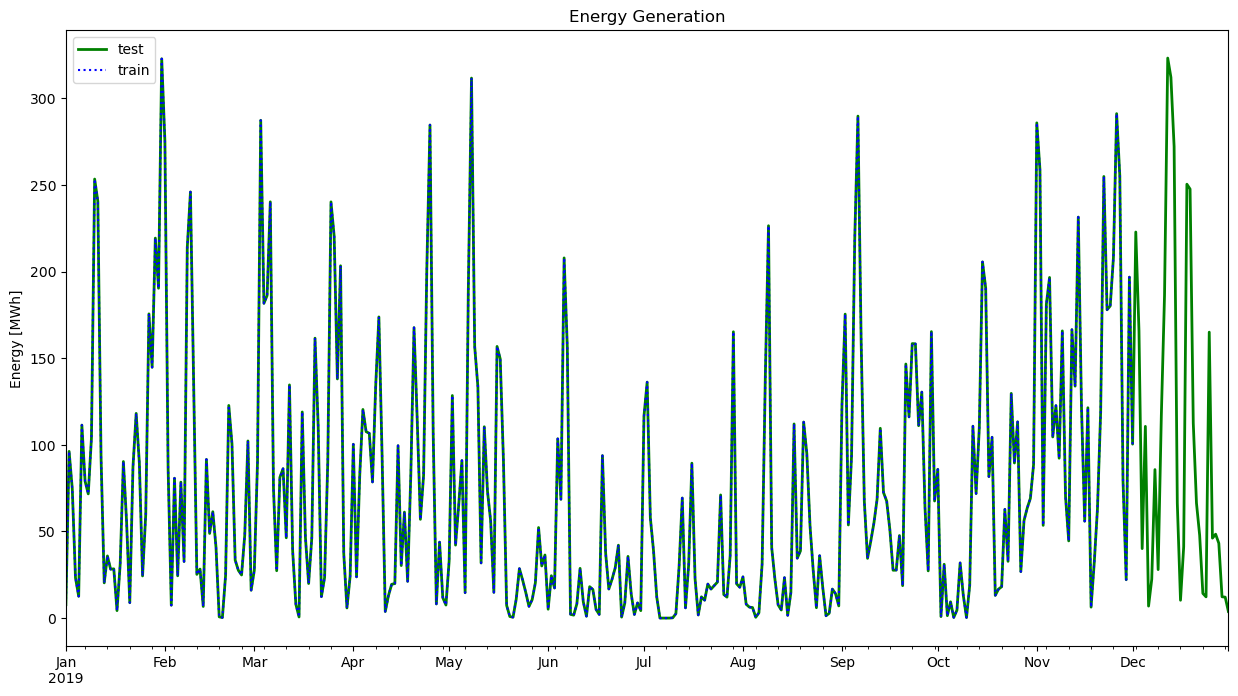

In [68]:
# Display the first time series
time_series_idx = 1

plt.figure(figsize=(15,8))

time_series[time_series_idx].plot(label= 'test',color ='g', lw = 2,title = 'Energy Generation')

time_series_training[time_series_idx].plot(label= 'train',color = 'b', ls = ':')

plt.ylabel('Energy [MWh]')
plt.legend()
plt.show()

In [69]:
def series_to_json_obj(ts):
    '''Returns adictionary of values in DeepAr, JSON format
    ARG:
    ts(series): A single time series
    
    RETURNS:
    json_obj(json) : A dictionary of values with "start" and "target" keys'''
    
    json_obj =  {"start": str(ts.index[0]), "target": list(ts) }
    
    return json_obj

In [70]:
import json
import os

def write_json_dataset(time_series, filename):
    
    with open(filename, 'wb') as f:
        #for each time series, there is one JSON line
        for ts in time_series:
            json_line = json.dumps(series_to_json_obj(ts)) + '\n'
            json_line = json_line.encode('utf-8')
            f.write(json_line)
    print(filename +' saved.')

In [71]:
# dave this data to a local directory
data_dir = 'json_energy_data'

# make data dir, if it does not exist
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [72]:
# directory to save train/test data
train_key = os.path.join(data_dir, 'train.json')
test_key = os.path.join(data_dir,'test.json')

# write train/test JSON files
write_json_dataset(time_series_training, train_key)
write_json_dataset(time_series, test_key)

json_energy_data\train.json saved.
json_energy_data\test.json saved.


In [73]:
train_key

'json_energy_data\\train.json'

In [74]:
import boto3
import sagemaker
from sagemaker import get_execution_role

In [75]:
# session, role and bucket
sagemaker_session = sagemaker.Session()
role = get_execution_role()
bucket = sagemaker_session.default_bucket()

ValueError: Must setup local AWS configuration with a region supported by SageMaker.